In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/Users/auraoupa/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (20, 8)
matplotlib.rcParams['xtick.labelsize']= 22
matplotlib.rcParams['ytick.labelsize']= 22
matplotlib.rcParams['axes.labelsize']= 22
matplotlib.rcParams.update({'font.size': 22})

import sys
sys.path.insert(0,"/Users/auraoupa/lib/python")
import numpy as np
import xarray as xr
import GriddedData
import time
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [2]:
ds_hgradT_JFM=xr.open_dataset('/Users/auraoupa/Data/TSG/ALL_temperature_gradients_1x1.nc')
ds_hgradS_JFM=xr.open_dataset('/Users/auraoupa/Data/TSG/ALL_salinity_gradients_1x1.nc')
ds_hgradb_JFM=xr.open_dataset('/Users/auraoupa/Data/TSG/ALL_buoyancy_gradients_1x1.nc')


In [4]:
hgradT_JFM=ds_hgradT_JFM['SST_LS']
hgradS_JFM=ds_hgradS_JFM['SSS_LS']
hgradb_JFM=ds_hgradb_JFM['SSb_LS']


In [5]:
def add_map(lon_min=-180, lon_max=180, lat_min=-90, lat_max=90,
            central_longitude=0., scale='auto', ax=None):
    """
    Add the map to the existing plot using cartopy

    Parameters
    ----------
    lon_min : float, optional
        Western boundary, default is -180
    lon_max : float, optional
        Eastern boundary, default is 180
    lat_min : float, optional
        Southern boundary, default is -90
    lat_max : float, optional
        Northern boundary, default is 90
    central_longitude : float, optional
        Central longitude, default is 180
    scale : {‘auto’, ‘coarse’, ‘low’, ‘intermediate’, ‘high, ‘full’}, optional
        The map scale, default is 'auto'
    ax : GeoAxes, optional
        A new GeoAxes will be created if None

    Returns
    -------
    ax : GeoAxes
    Return the current GeoAxes instance
    """
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    extent = (lon_min, lon_max, lat_min, lat_max)
    if ax is None:
        ax = plt.subplot(1, 1, 1,
                         projection=ccrs.PlateCarree(
	                                       central_longitude=0.))
    ax.set_extent(extent)
    land = cfeature.GSHHSFeature(scale=scale,
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


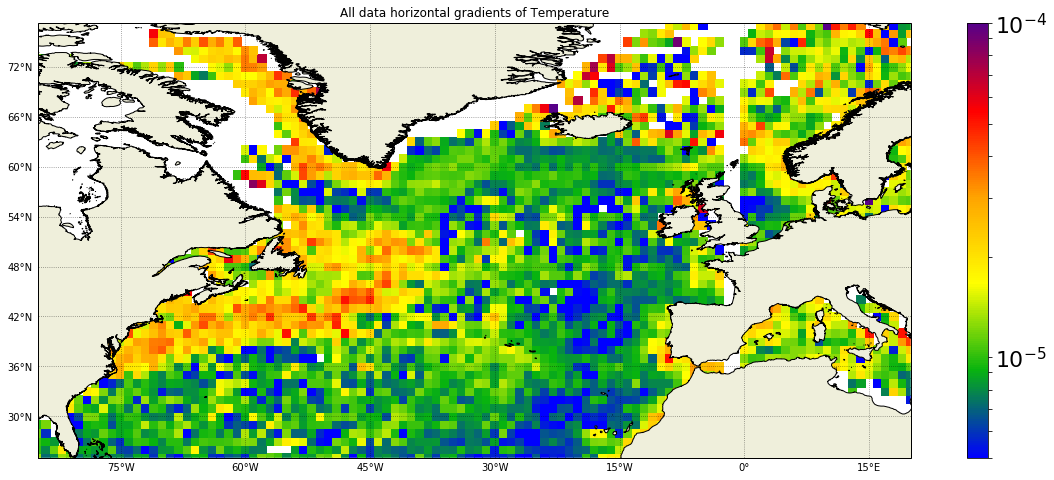

In [6]:
fig=plt.figure(figsize=(20,8))
data=ma.masked_invalid(ds_hgradT_JFM['SST_LS'])
lon=ds_hgradT_JFM['lon']
lat=ds_hgradT_JFM['lat']
#add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-6, vmax=1e-4)

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
extent=(lon_min, lon_max, lat_min, lat_max)
ax.set_extent((-85, 20, 25, 70))
land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
for box in boxes:
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],color='black',linewidth=2)
    ax.plot([x1, x2], [y2, y2],color='black',linewidth=2)
    ax.plot([x1, x1], [y1, y2],color='black',linewidth=2)
    ax.plot([x2, x2], [y1, y2],color='black',linewidth=2)
    ax.text(x2+1,(y1+y2)/2.0,box.name)
plt.colorbar()
plt.title('All data horizontal gradients of Temperature')
plt.savefig('ALL-DATA_TSG_T_gradients_year_1x1_log.png', dpi=300, bbox_inches='tight')

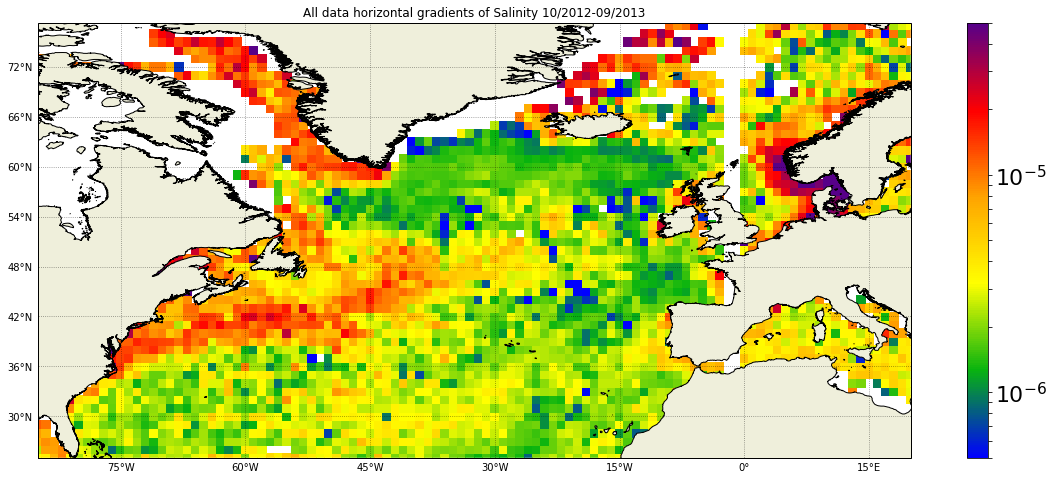

In [7]:
fig=plt.figure(figsize=(20,8))
data=ma.masked_invalid(ds_hgradS_JFM['SSS_LS'])
lon=ds_hgradT_JFM['lon']
lat=ds_hgradT_JFM['lat']
#add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-7, vmax=5e-5)

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
extent=(lon_min, lon_max, lat_min, lat_max)
ax.set_extent((-85, 20, 25, 70))
land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
for box in boxes:
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],color='black',linewidth=2)
    ax.plot([x1, x2], [y2, y2],color='black',linewidth=2)
    ax.plot([x1, x1], [y1, y2],color='black',linewidth=2)
    ax.plot([x2, x2], [y1, y2],color='black',linewidth=2)
    ax.text(x2+1,(y1+y2)/2.0,box.name)
plt.colorbar()
plt.title('All data horizontal gradients of Salinity 10/2012-09/2013')
plt.savefig('ALL-DATA_TSG_S_gradients_year_1x1_log.png', dpi=300, bbox_inches='tight')

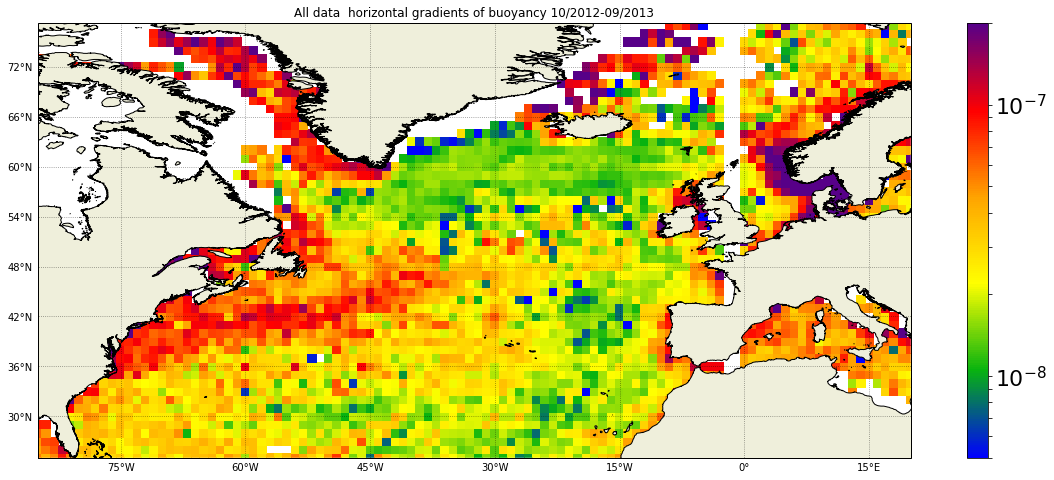

In [10]:
fig=plt.figure(figsize=(20,8))
data=ma.masked_invalid(ds_hgradb_JFM['SSb_LS'])
lon=ds_hgradT_JFM['lon']
lat=ds_hgradT_JFM['lat']
#add_map(lon_min=-85, lon_max=20, lat_min=25, lat_max=70, scale='low')
norm=matplotlib.colors.LogNorm(vmin=5e-9, vmax=2e-7)

ax = plt.subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
lon_min=-85
lon_max=20
lat_min=25
lat_max=70
extent=(lon_min, lon_max, lat_min, lat_max)
ax.set_extent((-85, 20, 25, 70))
land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)
plt.pcolormesh(lon,lat,data,cmap=cmclimate.cm.BlGrYeOrReVi200, norm=norm)
for box in boxes:
    x1 = box.lonmin
    x2 = box.lonmax
    y1 = box.latmin
    y2 = box.latmax
    ax.plot([x1, x2], [y1, y1],color='black',linewidth=2)
    ax.plot([x1, x2], [y2, y2],color='black',linewidth=2)
    ax.plot([x1, x1], [y1, y2],color='black',linewidth=2)
    ax.plot([x2, x2], [y1, y2],color='black',linewidth=2)
    ax.text(x2+1,(y1+y2)/2.0,box.name)
plt.colorbar()
plt.title('All data  horizontal gradients of buoyancy 10/2012-09/2013')
plt.savefig('ALL-DATA_TSG_b_gradients_year_1x1_log.png', dpi=300, bbox_inches='tight')

In [11]:
!montage NATL60_TSG_T_gradients_year_1x1_log.png ALL-DATA_TSG_T_gradients_year_1x1_log.png NATL60_TSG_S_gradients_year_1x1_log.png ALL-DATA_TSG_S_gradients_year_1x1_log.png NATL60_TSG_b_gradients_year_1x1_log.png ALL-DATA_TSG_buoy_gradients_year_1x1_log.png -geometry 2048x1024 -tile 2x3 -quality 100 TSG_year_data-NATL60_log.png
!convert TSG_year_data-NATL60_log.png -trim -bordercolor White -border 20x10 +repage TSG_year_data-NATL60_log.png

/bin/sh: montage: command not found
/bin/sh: convert: command not found
